In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import matthews_corrcoef
from scipy import stats

In [2]:
# Replace 'your_excel_file.xlsx' with the path to your Excel file
excel_file = 'C:\\Users\\creat\\OneDrive - Högskolan Dalarna\\thesis\\Updated_annual_data_with_merge-2.xlsx'

# Read the Excel file
df = pd.read_excel(excel_file)

In [3]:
df.columns

Index(['disclosure_id', 'company_fkey', 'date_of_disclosure', 'industry',
       'form_type', 'submitted_date', 'year_of_disclosure', 'is_effective',
       'is_material_weakness', 'text_disclosure', 'having_10a',
       'disclosures_per_comp', 'first_disclosure_year', 'last_disclosure_year',
       'Total word  Count', 'Difficult Words', 'Sentence Count',
       'Syllable Count', 'Gunning Fog Index', 'boilerplate_word_count',
       'redundant_word_count', 'Control Activities_total',
       'Control Environment_total', 'General terms_total',
       'Information and Communication_total', 'Monitoring_total',
       'Risk Assessment_total', 'Control Activities_Unique',
       'Control Environment_Unique', 'General terms_unique',
       'Information and Communication_Unique', 'Monitoring_Unique',
       'Risk Assessment_Unique'],
      dtype='object')

# Correlation Between Text Attributes

In [7]:
# Select the columns of interest
columns_of_interest = ['is_material_weakness','Total word  Count', 'Difficult Words', 'Sentence Count','Syllable Count','Gunning Fog Index','boilerplate_word_count','redundant_word_count']

# Calculate the correlation matrix for these columns
correlation_matrix = df[columns_of_interest].corr()

In [5]:
# Print correlation matrix
print(correlation_matrix)

                        Total word  Count  Difficult Words  Sentence Count  \
Total word  Count                1.000000         0.938518        0.800191   
Difficult Words                  0.938518         1.000000        0.743891   
Sentence Count                   0.800191         0.743891        1.000000   
Syllable Count                   0.997784         0.942109        0.801725   
Gunning Fog Index                0.021713         0.034880       -0.393406   
boilerplate_word_count           0.942125         0.995287        0.749051   
redundant_word_count             0.646045         0.643837        0.523678   

                        Syllable Count  Gunning Fog Index  \
Total word  Count             0.997784           0.021713   
Difficult Words               0.942109           0.034880   
Sentence Count                0.801725          -0.393406   
Syllable Count                1.000000           0.017973   
Gunning Fog Index             0.017973           1.000000   
boilerpla

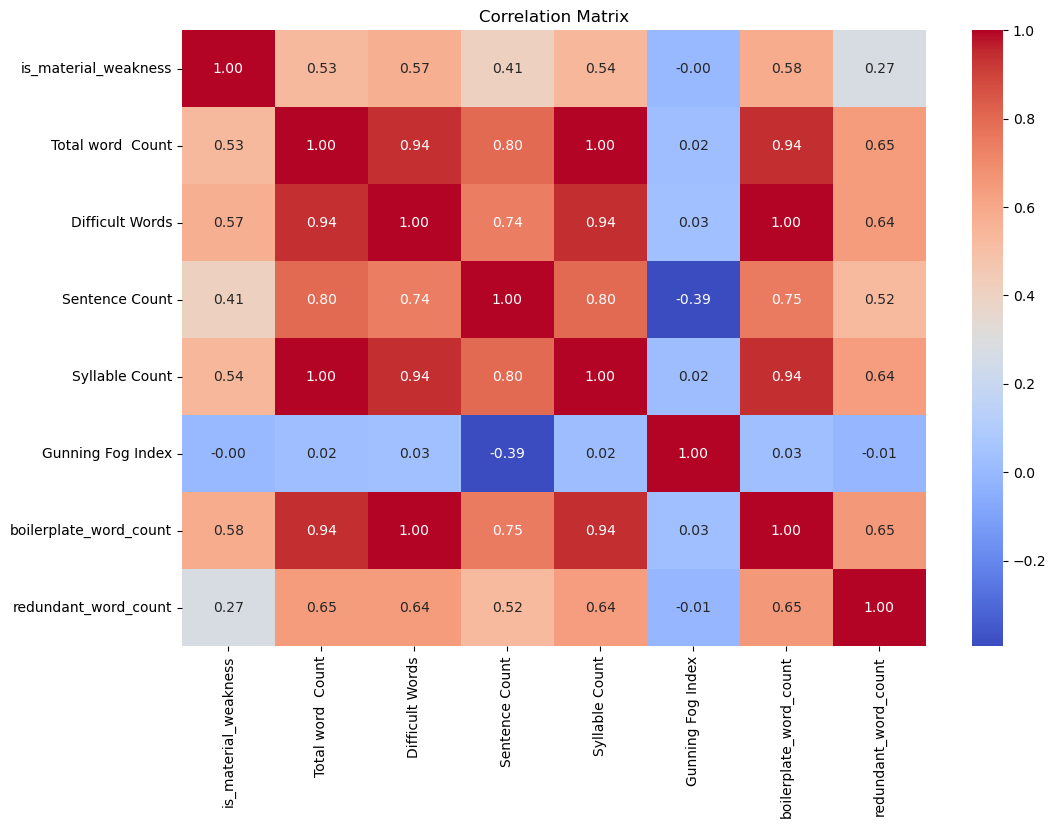

In [8]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [40]:
# Select the columns of interest
columns_of_interest = ['Control Activities_totaloccurences',
       'Control Environment_totaloccurences', 'General_totaloccurences',
       'Monitoring_totaloccurences', 'Risk Assessment_totaloccurences',
       'Information and Communication_totaloccurences','Total word  Count', 'Difficult Words', 'Average Sentence Length','Syllable Count','Gunning Fog Index','boilerplate_word_count','redundant_word_count']

# Calculate the correlation matrix for these columns
correlation_matrix = df[columns_of_interest].corr()

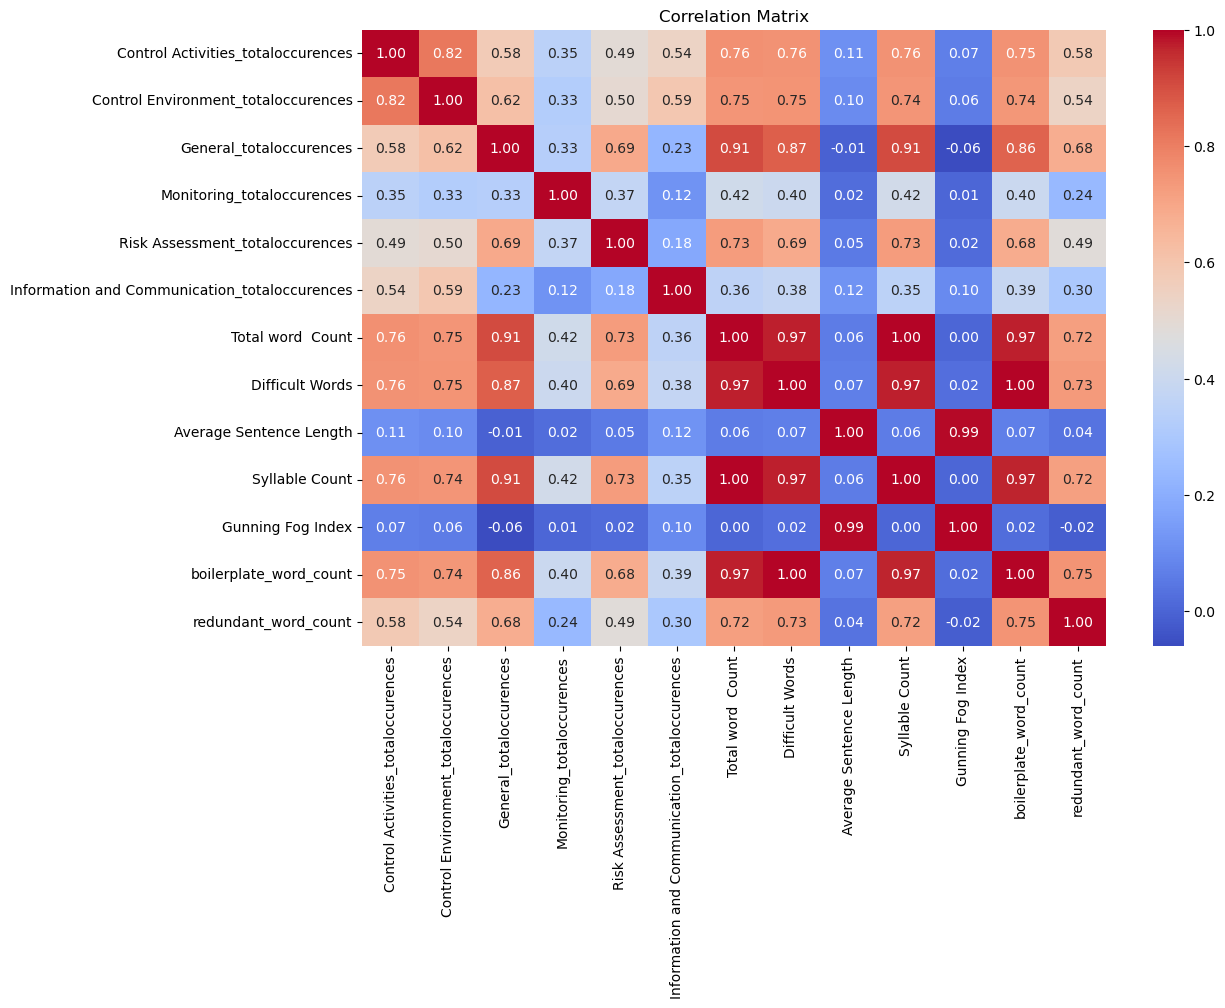

In [41]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlation between is_effectiveness and material_weakness

In [17]:


# Calculate the Matthews correlation coefficient
correlation_coefficient = matthews_corrcoef(df['is_effective'], df['is_material_weakness'])



In [18]:
# Print the Matthews correlation coefficient
print("Matthews Correlation Coefficient:", correlation_coefficient)

Matthews Correlation Coefficient: -0.8565724111523437


In [9]:
# Add jitter to binary variables for better visualization
jittered_effective = df['is_effective'] + np.random.normal(0, 0.1, len(df))
jittered_weakness = df['is_material_weakness'] + np.random.normal(0, 0.1, len(df))

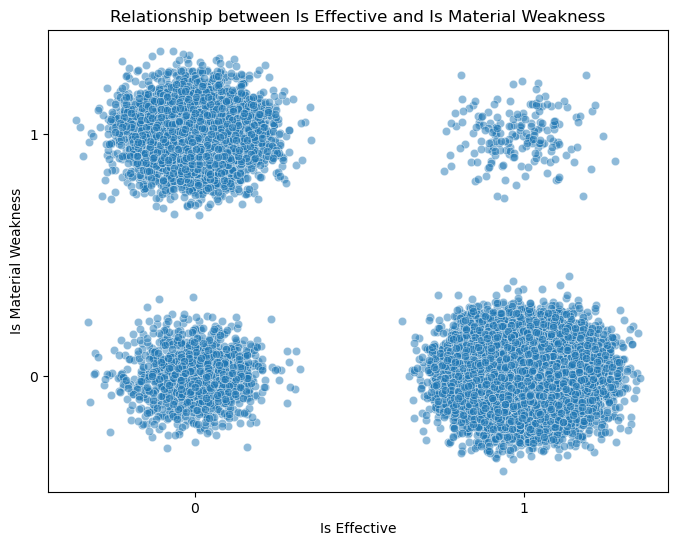

In [17]:
# Create scatter plot with jitter
colors = {0: 'blue', 1: 'red'}
plt.figure(figsize=(8, 6))
sns.scatterplot(x=jittered_effective, y=jittered_weakness, alpha=0.5)
plt.xlabel('Is Effective')
plt.ylabel('Is Material Weakness')
plt.title('Relationship between Is Effective and Is Material Weakness')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(False)
plt.show()

# Matthews Correlation Coefficient (MCC) of approximately -0.857 indeed suggests an inverse relationship between 'is_effective' and 'is_material_weakness'. This means that as the value of 'is_effective' increases (towards 1), the likelihood of 'is_material_weakness' being 1 decreases.

# correlation between text attributes and Topic Attributes

In [20]:
df.columns

Index(['disclosure_id', 'company_fkey', 'is_effective', 'is_material_weakness',
       'date_of_disclosure', 'industry', 'text_disclosure', 'year',
       'input_variable', 'target_variable',
       'Control Activities_totaloccurences',
       'Control Environment_totaloccurences', 'General_totaloccurences',
       'Monitoring_totaloccurences', 'Risk Assessment_totaloccurences',
       'Information and Communication_totaloccurences',
       'Control Activities_unique', 'Control Environment_unique',
       'General_unique', 'Monitoring_unique', 'Risk Assessment_unique',
       'Information and Communication_unique', 'Total word  Count',
       'Difficult Words', 'Average Sentence Length', 'Syllable Count',
       'Gunning Fog Index', 'boilerplate_word_count', 'redundant_word_count',
       'cluster'],
      dtype='object')

In [5]:
column_interest=['Control Activities_unique', 'Control Environment_unique',
       'General_unique', 'Monitoring_unique', 'Risk Assessment_unique',
       'Information and Communication_unique', 'Total word  Count',
       'Difficult Words', 'Average Sentence Length', 'Syllable Count',
       'Gunning Fog Index', 'boilerplate_word_count', 'redundant_word_count']

In [13]:
correlationmatrix_texttopic=df[column_interest].corr()

In [14]:
print(correlationmatrix_texttopic)

                                      Control Activities_unique  \
Control Activities_unique                              1.000000   
Control Environment_unique                             0.345364   
General_unique                                         0.432954   
Monitoring_unique                                      0.170233   
Risk Assessment_unique                                 0.229543   
Information and Communication_unique                   0.334567   
Total word  Count                                      0.431589   
Difficult Words                                        0.476392   
Average Sentence Length                                0.104256   
Syllable Count                                         0.431591   
Gunning Fog Index                                      0.091993   
boilerplate_word_count                                 0.464015   
redundant_word_count                                   0.398836   

                                      Control Environment_uni

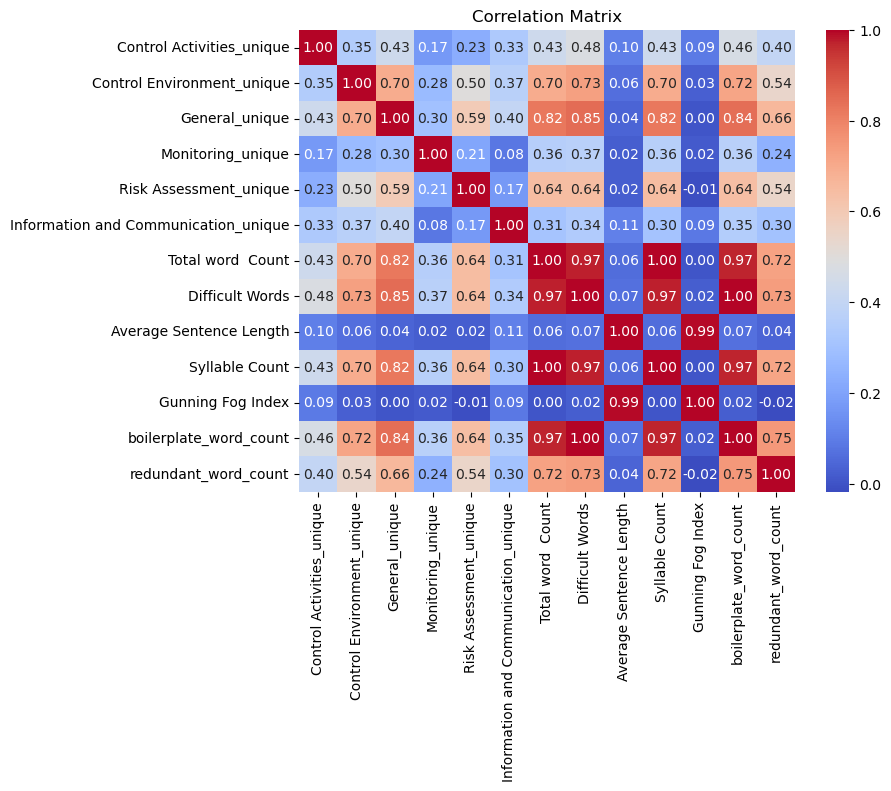

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(correlationmatrix_texttopic,annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Pointbiserial coefficient of materialweakness

# Correlation between material wekness and total word count

In [4]:
from scipy import stats

In [18]:
pointbiserial,p_value=stats.pointbiserialr(df['is_material_weakness'],df['Total word  Count'])

In [19]:
# Print the results
print("Point-Biserial Correlation Coefficient:", pointbiserial)
print("p-value:", p_value)

Point-Biserial Correlation Coefficient: 0.5009646514574321
p-value: 0.0


In [23]:
slope, intercept, r_value, p_value_scipy, std_err = stats.linregress(df['is_material_weakness'],df['Total word  Count'])


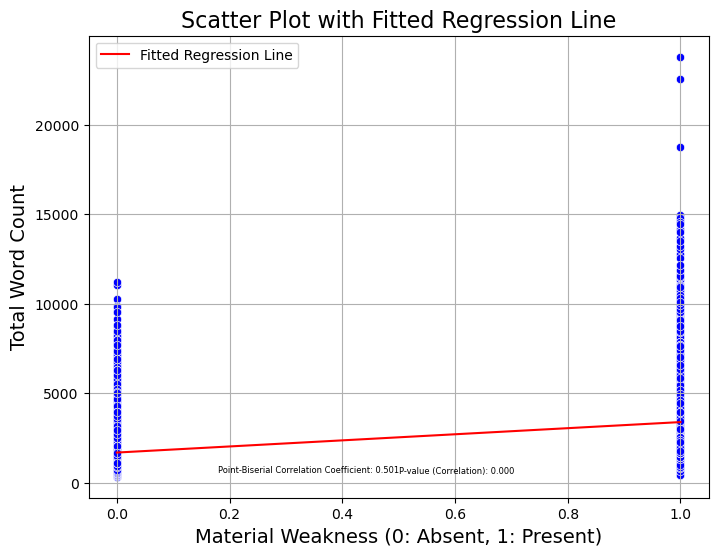

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['is_material_weakness'],y=df['Total word  Count'],color='blue')
plt.plot(df['is_material_weakness'], intercept + slope * df['is_material_weakness'], color='red', label='Fitted Regression Line')
# Annotate with correlation coefficient, p-value, and slope
plt.text(0.5, 700, f'Point-Biserial Correlation Coefficient: {round(pointbiserial,3):.3f}', ha='right', va='center', fontsize=6)
plt.text(0.5, 650, f'P-value (Correlation): {p_value:.3f}', ha='left', va='center', fontsize=6)
#plt.text(0.5, 600, f'Slope (Regression): {slope:.3f}', ha='right', va='center', fontsize=6)

# Add labels and title
plt.xlabel('Material Weakness (0: Absent, 1: Present)', fontsize=14)
plt.ylabel('Total Word Count', fontsize=14)
plt.title('Scatter Plot with Fitted Regression Line', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# A positive point-biserial correlation coefficient suggests a positive relationship between material weakness and word count.
Therefore, if material weakness tends to increase (i.e., more instances of material weakness are observed), the total word count tends to increase as well.
Conversely, if material weakness tends to decrease (i.e., fewer instances of material weakness are observed), the total word count tends to decrease as well.
So, your interpretation is correct: when material weakness tends to move to 1 (i.e., when more instances of material weakness are observed), the word count shows an increase, as indicated by the positive correlation coefficient.

In [6]:
df.columns

Index(['disclosure_id', 'company_fkey', 'is_effective', 'is_material_weakness',
       'date_of_disclosure', 'industry', 'text_disclosure', 'year',
       'input_variable', 'target_variable',
       'Control Activities_totaloccurences',
       'Control Environment_totaloccurences', 'General_totaloccurences',
       'Monitoring_totaloccurences', 'Risk Assessment_totaloccurences',
       'Information and Communication_totaloccurences',
       'Control Activities_unique', 'Control Environment_unique',
       'General_unique', 'Monitoring_unique', 'Risk Assessment_unique',
       'Information and Communication_unique', 'Total word  Count',
       'Difficult Words', 'Average Sentence Length', 'Syllable Count',
       'Gunning Fog Index', 'boilerplate_word_count', 'redundant_word_count',
       'cluster'],
      dtype='object')

In [7]:
pointbiserial,p_value=stats.pointbiserialr(df['is_material_weakness'],df['Difficult Words'])

In [8]:
# Print the results
print("Point-Biserial Correlation Coefficient of Difficult words:", pointbiserial)
print("p-value:", p_value)

Point-Biserial Correlation Coefficient: 0.5483396372833675
p-value: 0.0


In [9]:
pointbiserial,p_value=stats.pointbiserialr(df['is_material_weakness'],df['Average Sentence Length'])

In [11]:
# Print the results
print("Point-Biserial Correlation Coefficient of average sentence length:", pointbiserial)
print("p-value:", p_value)

Point-Biserial Correlation Coefficient: -0.0
p-value: 0.9001775135683989


In [12]:
pointbiserial,p_value=stats.pointbiserialr(df['is_material_weakness'],df['Syllable Count'])
# Print the results
print("Point-Biserial Correlation Coefficient of syllabel count:", pointbiserial)
print("p-value:", p_value)

Point-Biserial Correlation Coefficient of syllabel count: 0.5046185332503347
p-value: 0.0


In [13]:
pointbiserial,p_value=stats.pointbiserialr(df['is_material_weakness'],df['Gunning Fog Index'])
# Print the results
print("Point-Biserial Correlation Coefficient of readability index:", pointbiserial)
print("p-value:", p_value)

Point-Biserial Correlation Coefficient of readability index: -0.015029341868407261
p-value: 0.009765197195600935


In [14]:
pointbiserial,p_value=stats.pointbiserialr(df['is_material_weakness'],df['boilerplate_word_count'])
# Print the results
print("Point-Biserial Correlation Coefficient of boilerplate_word_count:", pointbiserial)
print("p-value:", p_value)

Point-Biserial Correlation Coefficient of boilerplate_word_count: 0.5595653877431488
p-value: 0.0


C:\Users\creat\AppData\Local\Temp\ipykernel_16372\4021581821.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Gunning Fog Index'], shade=True)


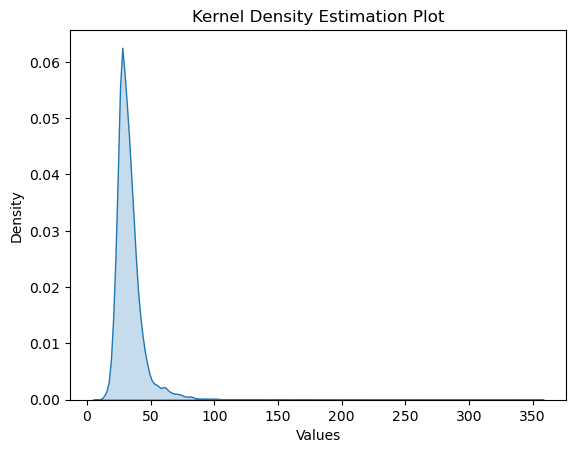

In [19]:
sns.kdeplot(df['Gunning Fog Index'], shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plot')
plt.show()

In [20]:
pointbiserial,p_value=stats.pointbiserialr(df['is_material_weakness'],df['redundant_word_count'])
# Print the results
print("Point-Biserial Correlation Coefficient of boilerplate_word_count:", pointbiserial)
print("p-value:", p_value)

Point-Biserial Correlation Coefficient of boilerplate_word_count: 0.36254151225799514
p-value: 0.0
